In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical
import os

# train

In [71]:
df=pd.read_csv('data/sign_mnist_train/sign_mnist_train.csv')
print(df.shape)
df.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [72]:
train_images=df.values[0:,1:]
train_labels=df.values[0:,0]

In [73]:
train_labels=to_categorical(train_labels)

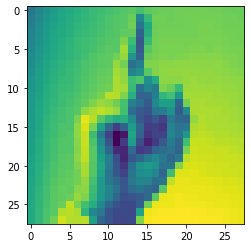

In [74]:
pic1=train_images[0]
plt.imshow(pic1.reshape(28,28))

In [75]:
print(train_images.shape,train_labels.shape)

(27455, 784) (27455, 25)


In [76]:
train_images=train_images/255.0
train_images=train_images.reshape(27455,28,28,1)

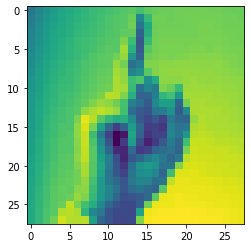

In [77]:
pic1=train[0]
plt.imshow(pic1.reshape(28,28))

# validation

In [85]:
df=pd.read_csv('data/sign_mnist_test/sign_mnist_test.csv')
print(df.shape)
df.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [86]:
validation_images=df.values[0:,1:]
validation_labels=df.values[0:,0]

In [87]:
validation_labels=to_categorical(validation_labels)

In [88]:
print(validation_images.shape,validation_labels.shape)

(7172, 784) (7172, 25)


In [89]:
validation_images=validation_images/255.0
validation_images=validation_images.reshape(7172,28,28,1)

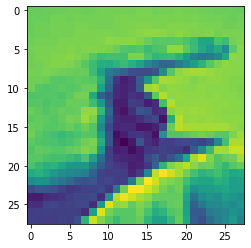

In [90]:
pic1=validation_images[0]
plt.imshow(pic1.reshape(28,28))

# model

In [94]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(25,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(train_images,train_labels,validation_data=(validation_images,validation_labels),epochs=10)

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 16s 591us/sample - loss: 0.9668 - accuracy: 0.7082 - val_loss: 0.4689 - val_accuracy: 0.8621
Epoch 2/10
27455/27455 [==============================] - 16s 593us/sample - loss: 0.0389 - accuracy: 0.9914 - val_loss: 0.3789 - val_accuracy: 0.9197
Epoch 3/10
27455/27455 [==============================] - 16s 591us/sample - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.4005 - val_accuracy: 0.9189
Epoch 4/10
27455/27455 [==============================] - 17s 628us/sample - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.3395 - val_accuracy: 0.9453
Epoch 5/10
27455/27455 [==============================] - 18s 664us/sample - loss: 4.7369e-04 - accuracy: 1.0000 - val_loss: 0.3642 - val_accuracy: 0.9426
Epoch 6/10
27455/27455 [==============================] - 16s 587us/sample - loss: 2.1032e-04 - accuracy: 1.0000 - val_loss: 0.3837 - val_accuracy: 0.9407
Epoch 7/10
27455/27455 [=============

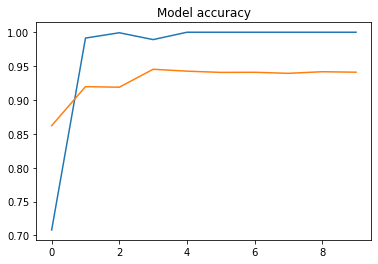

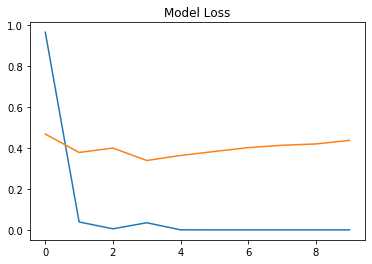

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.show()

# test on train

18


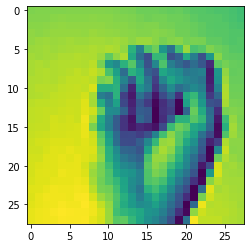

In [105]:
index=20
sample_image=train_images[20]
sample_label=train_labels[20]
plt.imshow(sample_image.reshape(28,28))
print(list(sample_label).index(1))

In [107]:
sample=sample_image.reshape(1,28,28,1)
result=model.predict(sample)
result=list(result[0])
print(result.index(max(result)))

18
